# Munging tabular data

We're going to go through how to munge tabular data in more detail (and _slowly_). The aim is for you to get comfortable with the tools we're using:

- [pandas](pandas.pydata.org) for data handling (our dataframe library)
- [seaborn](seaborn.pydata.org) for _nice_ data visualization
- [scipy](scipy.org) for scientific libraries (particularly `scipy.stats` which we'll use for fitting some more unusual probability distributions), and 
- [statsmodels](statsmodels.org) which gives us some more expressive curve fitting approaches

The other aim is to get familiar with code-sharing workflows - so we will be doing pair programming for the duration of the day! _You will probably want to take a moment to look at the documentation of the libraries above - especially pandas_

The other useful resource is Stack Overflow - if you have a question that sounds like 'how do I do {x}' then someone will probably have answered it on SO. Questions are also tagged by library so if you have a particular pandas question you can do something like going to https://stackoverflow.com/questions/tagged/pandas (just replace the 'pandas' in the URL with whatever library you're trying to use.

Generally answers on SO are probably a lot closer to getting you up and running than the documentation. Once you get used to the library then the documentation is generally a quicker reference. We will cover strategies for getting help in class.

## Git links

We will be working through using GitHub and GitKraken to share code between pairs. We will go through all the workflow in detail in class but here are some useful links for reference:

- GitKraken interface basics: https://support.gitkraken.com/start-here/interface
- Staging and committing (save current state -> local history): https://support.gitkraken.com/working-with-commits/commits
- Pushing and pulling (sync local history <-> GitHub history): https://support.gitkraken.com/working-with-repositories/pushing-and-pulling
- Forking and pull requests (request to sync your GitHub history <-> someone else's history - requires a _review_):
  - https://help.github.com/articles/about-forks/
  - https://help.github.com/articles/creating-a-pull-request-from-a-fork/

## Step 1: Reading my data

In pairs work out how to read your data into a pandas dataframe.

If you have your own tabular data please start using it here. If not, use the ATCO dataset from last week.

In [40]:
import pandas as pd
import seaborn as sns
import numpy as np
from os import path

seaborn.set()

# Setting where our data is sitting
data_folder = path.join(
    path.abspath('..'),  # '..' means the directory above this one
    'data')
data_folder

# your code goes here

'C:\\Users\\wesly.randa\\Desktop\\02-week2\\02-getting-to-know-the-tools\\data'

Once you've worked this out in the Jupyter notebook, transfer your code to a Python script (say a function called `load_data` in a file called `munging.py` in the same directory as the notebooks - you can create a text file in the Jupyter notebook home screen). Then try importing your load function with 

```python 
from munging import load_data

df = load_data('path/to/datafile')
```

In [5]:
#df = load_data ('02-week2/02-getting-to-know-the-tools/data')
drillholes = path.join(data_folder, 'python_data.csv')
drillholes = pd.read_csv(drillholes)
#drillholes.sheet_names

Next work out how to access a column within your dataframe. 

- How can you list all the column names? 
- There are two ways to access columns by name - try to find out what both of these are. 
- There's also methods to access columns by number - try to do this as well

Next look at how to access rows - both using labels and numbers.

In [6]:
drillholes.head()


,DHID,MIDX,MIDY,MIDZ,LENGTH,FROM,TO,GEOCOD,FE,SIO2,...,LOI,S,TIO2,MGO,CAO,ACDENS,ASS_TO,LOI425,LOI650,ORE
0,B3D58,532634.759,7501740.104,572.05,2.0,12.0,14.0,435,58.88,2.50,...,9.76,0.058,0.13,0.04,0.01,-99.0,99.27,-99.0,-99.0,0
1,B3D58,532634.759,7501740.104,570.05,2.0,14.0,16.0,435,58.39,3.02,...,9.25,0.055,0.18,0.05,0.01,-99.0,99.56,-99.0,-99.0,0
2,B3D58,532634.759,7501740.104,568.05,2.0,16.0,18.0,435,56.26,4.37,...,10.45,0.061,0.20,0.06,-99.00,-99.0,99.68,-99.0,-99.0,0
3,B3D58,532634.759,7501740.104,566.05,2.0,18.0,20.0,435,56.83,3.36,...,10.31,0.051,0.25,0.04,0.01,-99.0,99.43,-99.0,-99.0,0
4,B3D58,532634.759,7501740.104,564.05,2.0,20.0,22.0,435,52.85,7.46,...,9.10,0.053,0.27,0.06,0.03,-99.0,99.25,-99.0,-99.0,0


To access records efficiently pandas can construct an index for your data. Find out how you set the index on your dataframe and pick a useful column (i.e. one that has a unique value for each record and can be sorted) and set this as the index.

Try selecting data using your index (especially if you have a timeseries index)

In [14]:
drillholes.loc[3,['GEOCOD','LOI']]

GEOCOD      435
LOI       10.31
Name: 3, dtype: object

In [16]:
drillholes.describe()

,MIDX,MIDY,MIDZ,LENGTH,FROM,TO,GEOCOD,FE,SIO2,AL2O3,...,LOI,S,TIO2,MGO,CAO,ACDENS,ASS_TO,LOI425,LOI650,ORE
count,53758.000000,5.375800e+04,53758.000000,53758.000000,53758.000000,53758.000000,53758.000000,53758.000000,53758.000000,53758.000000,...,53758.000000,53758.000000,53758.000000,53758.000000,53758.000000,53758.000000,53758.000000,53758.000000,53758.000000,53758.0
mean,522475.517622,7.500615e+06,543.005647,1.970637,29.022393,30.993030,360.239443,58.058392,4.997309,2.405147,...,6.126840,-1.185290,-0.355331,-0.420349,-0.420982,-24.089440,99.046832,-49.897400,-52.184226,0.0
std,4381.509811,1.119572e+03,44.083394,0.178074,29.039916,29.043406,74.571117,12.242179,8.415797,7.536345,...,7.816579,10.897091,6.985494,7.056649,6.994032,44.883289,13.997143,52.239444,49.787554,0.0
min,511745.661000,7.497581e+06,333.475000,0.100000,0.000000,1.000000,265.000000,-99.000000,-99.000000,-99.000000,...,-99.000000,-99.000000,-99.000000,-99.000000,-99.000000,-99.000000,-99.000000,-99.000000,-99.000000,0.0
25%,518211.980250,7.499486e+06,516.403500,2.000000,10.000000,12.000000,265.000000,55.790000,2.520000,1.290000,...,4.720000,0.008000,0.030000,0.040000,0.020000,-99.000000,99.860000,-99.000000,-99.000000,0.0
50%,522279.659000,7.500803e+06,544.001000,2.000000,20.000000,22.000000,402.000000,59.450000,4.520000,2.330000,...,6.220000,0.020000,0.080000,0.060000,0.040000,2.632000,100.010000,-99.000000,-99.000000,0.0
75%,526322.170750,7.501504e+06,571.540750,2.000000,40.000000,42.000000,412.000000,62.660000,7.310000,3.830000,...,8.380000,0.038000,0.160000,0.100000,0.060000,2.971000,100.200000,5.050000,0.570000,0.0
max,533430.414000,7.502936e+06,708.533000,12.500000,218.000000,220.000000,435.000000,68.170000,58.750000,48.420000,...,27.660000,3.420000,5.650000,4.680000,8.400000,4.344000,107.970000,22.510000,9.870000,0.0


If you get through this quickly, take a look at the [other data formats that pandas is able to read](http://pandas.pydata.org/pandas-docs/stable/api.html#input-output) and find out about these online - we can have a discussion about when you might like to use them. Pay particular attention to [`pandas.read_sql`](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.read_sql.html#pandas.read_sql) as that's pretty useful for ripping data from databases.

Go to [data.gov.au](https://data.gov.au) and find some other data in different formats to read and try reading it.

## Step 2: What's in my data?

First find the documentation in pandas on datatypes!

Work through the columns in your dataset and assign them to the correct datatype.

In [19]:
drillholes.dtypes

DHID       object
MIDX      float64
MIDY      float64
MIDZ      float64
LENGTH    float64
FROM      float64
TO        float64
GEOCOD      int64
FE        float64
SIO2      float64
AL2O3     float64
P         float64
MN        float64
LOI       float64
S         float64
TIO2      float64
MGO       float64
CAO       float64
ACDENS    float64
ASS_TO    float64
LOI425    float64
LOI650    float64
ORE         int64
dtype: object

In [21]:
drillholes['GEOCOD'] = drillholes['GEOCOD'].astype('category') 

In [22]:
drillholes.dtypes

DHID        object
MIDX       float64
MIDY       float64
MIDZ       float64
LENGTH     float64
FROM       float64
TO         float64
GEOCOD    category
FE         float64
SIO2       float64
AL2O3      float64
P          float64
MN         float64
LOI        float64
S          float64
TIO2       float64
MGO        float64
CAO        float64
ACDENS     float64
ASS_TO     float64
LOI425     float64
LOI650     float64
ORE          int64
dtype: object

How will you find incorrect values in your data? Can you write a small function to test these? For more details on Python functions you can work through [this little tutorial on DataCamp](https://www.datacamp.com/community/tutorials/functions-python-tutorial)

Also take a look at the [`apply`](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.apply.html) method for more tricky data munging that has to be carried out record-by-record

Try writing a small function to apply to one of the columns in your dataframe - here's a toy example to get you started: your function could look something like:

```python
import random
import pandas

# Make some bogus data - see random_data.py for defns
from random_data import random_dataframe

df = random_dataframe(10)

# Define our bogus function
def random_replacement(record):
    "Some of column 'a', some of column 'b'"
    return random.sample([record.a, record.b], 1)[0]

# Apply function once per record
df.apply(random_replacement, axis='columns')
```

Work out how to apply a function once per column as well.

In [23]:
drillholes = drillholes.assign(ratio=drillholes.SIO2/drillholes.AL2O3)

In [24]:
drillholes.head()

,DHID,MIDX,MIDY,MIDZ,LENGTH,FROM,TO,GEOCOD,FE,SIO2,...,S,TIO2,MGO,CAO,ACDENS,ASS_TO,LOI425,LOI650,ORE,ratio
0,B3D58,532634.759,7501740.104,572.05,2.0,12.0,14.0,435,58.88,2.50,...,0.058,0.13,0.04,0.01,-99.0,99.27,-99.0,-99.0,0,1.106195
1,B3D58,532634.759,7501740.104,570.05,2.0,14.0,16.0,435,58.39,3.02,...,0.055,0.18,0.05,0.01,-99.0,99.56,-99.0,-99.0,0,0.964856
2,B3D58,532634.759,7501740.104,568.05,2.0,16.0,18.0,435,56.26,4.37,...,0.061,0.20,0.06,-99.00,-99.0,99.68,-99.0,-99.0,0,1.126289
3,B3D58,532634.759,7501740.104,566.05,2.0,18.0,20.0,435,56.83,3.36,...,0.051,0.25,0.04,0.01,-99.0,99.43,-99.0,-99.0,0,0.854962
4,B3D58,532634.759,7501740.104,564.05,2.0,20.0,22.0,435,52.85,7.46,...,0.053,0.27,0.06,0.03,-99.0,99.25,-99.0,-99.0,0,1.147692


### Step 3: Tidy my data

Work through the 'tidy data checklist' and make sure your data has been tidied!

1. Each variable you measure should be in one column.
2. Each different observation of that variable should be in a different row.
3. There should be one table for each "kind" of variable.
4. If you have multiple tables, they should include a column in the table that allows them to be linked.

This is a good overview: http://www.jeannicholashould.com/tidy-data-in-python.html

If your data is already tidy, try downloading the data from that tutorial and working through it instead.

In [25]:
drillholes.replace(-99, np.nan)

,DHID,MIDX,MIDY,MIDZ,LENGTH,FROM,TO,GEOCOD,FE,SIO2,...,S,TIO2,MGO,CAO,ACDENS,ASS_TO,LOI425,LOI650,ORE,ratio
0,B3D58,532634.759,7501740.104,572.050,2.0,12.0,14.0,435,58.88,2.50,...,0.058,0.130,0.04,0.01,NaN,99.27,NaN,NaN,0,1.106195
1,B3D58,532634.759,7501740.104,570.050,2.0,14.0,16.0,435,58.39,3.02,...,0.055,0.180,0.05,0.01,NaN,99.56,NaN,NaN,0,0.964856
2,B3D58,532634.759,7501740.104,568.050,2.0,16.0,18.0,435,56.26,4.37,...,0.061,0.200,0.06,NaN,NaN,99.68,NaN,NaN,0,1.126289
3,B3D58,532634.759,7501740.104,566.050,2.0,18.0,20.0,435,56.83,3.36,...,0.051,0.250,0.04,0.01,NaN,99.43,NaN,NaN,0,0.854962
4,B3D58,532634.759,7501740.104,564.050,2.0,20.0,22.0,435,52.85,7.46,...,0.053,0.270,0.06,0.03,NaN,99.25,NaN,NaN,0,1.147692
5,B3D58,532634.759,7501740.104,562.050,2.0,22.0,24.0,435,48.97,11.28,...,0.051,0.330,0.13,0.03,NaN,99.71,NaN,NaN,0,1.212903
6,B3D58,532634.759,7501740.104,560.050,2.0,24.0,26.0,435,55.43,6.16,...,0.041,0.200,0.07,0.02,NaN,99.91,NaN,NaN,0,1.117967
7,B3D58,532634.759,7501740.104,558.050,2.0,26.0,28.0,435,58.31,5.04,...,0.036,0.130,0.07,0.03,NaN,100.16,NaN,NaN,0,1.491124
8,DH1367~BS4,527799.220,7502253.980,558.170,2.0,0.0,2.0,265,62.50,3.80,...,NaN,0.150,0.04,0.09,NaN,100.35,NaN,NaN,0,1.652174
9,DH1367~BS4,527799.220,7502253.980,556.170,2.0,2.0,4.0,265,56.80,10.70,...,NaN,0.140,0.05,0.06,NaN,99.19,NaN,NaN,0,5.095238


In [26]:
drillholes = drillholes.replace(-99, np.nan)

In [28]:
drillholes.describe()


,MIDX,MIDY,MIDZ,LENGTH,FROM,TO,FE,SIO2,AL2O3,P,...,S,TIO2,MGO,CAO,ACDENS,ASS_TO,LOI425,LOI650,ORE,ratio
count,53758.000000,5.375800e+04,53758.000000,53758.000000,53758.000000,53758.000000,53491.000000,53491.000000,53491.000000,53485.000000,...,53099.000000,53490.000000,53484.000000,53489.000000,39558.000000,53491.000000,25228.000000,25228.000000,53758.0,53758.000000
mean,522475.517622,7.500615e+06,543.005647,1.970637,29.022393,30.993030,58.842348,5.516411,2.911310,0.126062,...,0.028667,0.138907,0.084677,0.074779,2.800947,100.035382,5.632059,0.759093,0.0,2.600207
std,4381.509811,1.119572e+03,44.083394,0.178074,29.039916,29.043406,5.184136,4.113816,2.344202,0.070043,...,0.039648,0.206201,0.100527,0.210169,0.365305,0.371404,2.198355,0.605324,0.0,3.927663
min,511745.661000,7.497581e+06,333.475000,0.100000,0.000000,1.000000,6.630000,0.520000,0.140000,0.011000,...,0.001000,0.005000,0.005000,0.005000,1.569000,94.020000,0.850000,0.010000,0.0,0.090148
25%,518211.980250,7.499486e+06,516.403500,2.000000,10.000000,12.000000,55.850000,2.550000,1.300000,0.088000,...,0.008000,0.030000,0.040000,0.020000,2.548000,99.860000,3.940000,0.400000,0.0,1.250548
50%,522279.659000,7.500803e+06,544.001000,2.000000,20.000000,22.000000,59.490000,4.540000,2.340000,0.114000,...,0.021000,0.080000,0.060000,0.040000,2.817000,100.010000,5.230000,0.600000,0.0,1.660910
75%,526322.170750,7.501504e+06,571.540750,2.000000,40.000000,42.000000,62.680000,7.330000,3.850000,0.151000,...,0.038000,0.160000,0.100000,0.060000,3.062000,100.200000,7.080000,0.920000,0.0,2.697674
max,533430.414000,7.502936e+06,708.533000,12.500000,218.000000,220.000000,68.170000,58.750000,48.420000,6.030000,...,3.420000,5.650000,4.680000,8.400000,4.344000,107.970000,22.510000,9.870000,0.0,180.120000


In [31]:
drillholes.groupby('GEOCOD').mean()

,MIDX,MIDY,MIDZ,LENGTH,FROM,TO,FE,SIO2,AL2O3,P,...,S,TIO2,MGO,CAO,ACDENS,ASS_TO,LOI425,LOI650,ORE,ratio
GEOCOD,,,,,,,,,,,,,,,,,,,,,
265,523170.316906,7.501149e+06,566.960206,1.978195,13.030942,15.009137,57.619047,6.634583,3.072007,0.108708,...,0.039455,0.196073,0.085853,0.095451,2.794004,100.001648,5.884911,0.742285,0,2.853690
402,521698.053116,7.500278e+06,514.952222,1.972663,54.187741,56.160404,62.363050,3.182062,1.789543,0.137968,...,0.014397,0.039960,0.067106,0.041668,2.788436,100.104927,4.470912,0.525515,0,2.624953
412,521717.556612,7.500220e+06,512.261208,1.967564,56.269717,58.237281,58.600683,5.043493,3.665714,0.178978,...,0.019886,0.097426,0.075554,0.045379,2.767445,100.057859,5.422708,1.026266,0,1.674370
435,522607.967673,7.500355e+06,551.389031,1.958880,13.328979,15.287858,57.365939,6.385349,3.347977,0.110845,...,0.031478,0.172962,0.105382,0.092594,2.839487,100.005400,6.377197,0.859245,0,2.710498


In [34]:
drillholes.nunique()

DHID       4613
MIDX      48931
MIDY      48772
MIDZ      45102
LENGTH       10
FROM        159
TO          160
GEOCOD        4
FE         2792
SIO2       2251
AL2O3      1481
P           437
MN          635
LOI        1171
S           331
TIO2        252
MGO         153
CAO         438
ACDENS     2040
ASS_TO      388
LOI425     1042
LOI650      468
ORE           1
ratio     41347
dtype: int64

In [35]:
list(drillholes.columns.values)

['DHID',
 'MIDX',
 'MIDY',
 'MIDZ',
 'LENGTH',
 'FROM',
 'TO',
 'GEOCOD',
 'FE',
 'SIO2',
 'AL2O3',
 'P',
 'MN',
 'LOI',
 'S',
 'TIO2',
 'MGO',
 'CAO',
 'ACDENS',
 'ASS_TO',
 'LOI425',
 'LOI650',
 'ORE',
 'ratio']

In [39]:
drillholes[['FE',
 'SIO2',
 'AL2O3',
 'P',
 'MN',
 'LOI',
 'S',
 'TIO2',
 'MGO',
 'CAO',
 'ACDENS',
 'ASS_TO',
 'LOI425',
 'LOI650',
            'GEOCOD'
]].groupby('GEOCOD').mean()

,FE,SIO2,AL2O3,P,MN,LOI,S,TIO2,MGO,CAO,ACDENS,ASS_TO,LOI425,LOI650
GEOCOD,,,,,,,,,,,,,,
265,57.619047,6.634583,3.072007,0.108708,0.029583,7.059934,0.039455,0.196073,0.085853,0.095451,2.794004,100.001648,5.884911,0.742285
402,62.363050,3.182062,1.789543,0.137968,0.095228,5.271051,0.014397,0.039960,0.067106,0.041668,2.788436,100.104927,4.470912,0.525515
412,58.600683,5.043493,3.665714,0.178978,0.089064,6.694402,0.019886,0.097426,0.075554,0.045379,2.767445,100.057859,5.422708,1.026266
435,57.365939,6.385349,3.347977,0.110845,0.062639,7.368392,0.031478,0.172962,0.105382,0.092594,2.839487,100.005400,6.377197,0.859245


C:\Users\wesly.randa\AppData\Local\Continuum\anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


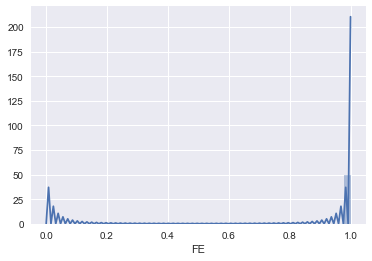

In [46]:
sns.distplot(drillholes['FE'].notnull())

NameError: name 'plt' is not defined